## Reto 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.

---
    
### 2. Desarrollo:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 y 3 variables categóricas y luego realizar algunas visualizaciones.

### a) Segmentando por tipo y número de cuartos

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
housing_data = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto melbourne_housing-clean.csv')

# Crear una tabla de contingencia
contingency_table = pd.crosstab(housing_data['type'], housing_data['rooms'])

# Visualizar la tabla de contingencia
contingency_table


rooms,1,2,3,4,5,6,7,8
type,,,,,,,,
h,54,1261,3912,1991,475,54,9,6
t,9,299,575,138,4,0,0,0
u,582,1829,429,17,0,1,0,1


La tabla de contingencia muestra la cantidad de propiedades según su tipo ('h' para casa, 't' para casa adosada y 'u' para unidad) y el número de habitaciones (de 1 a 8).


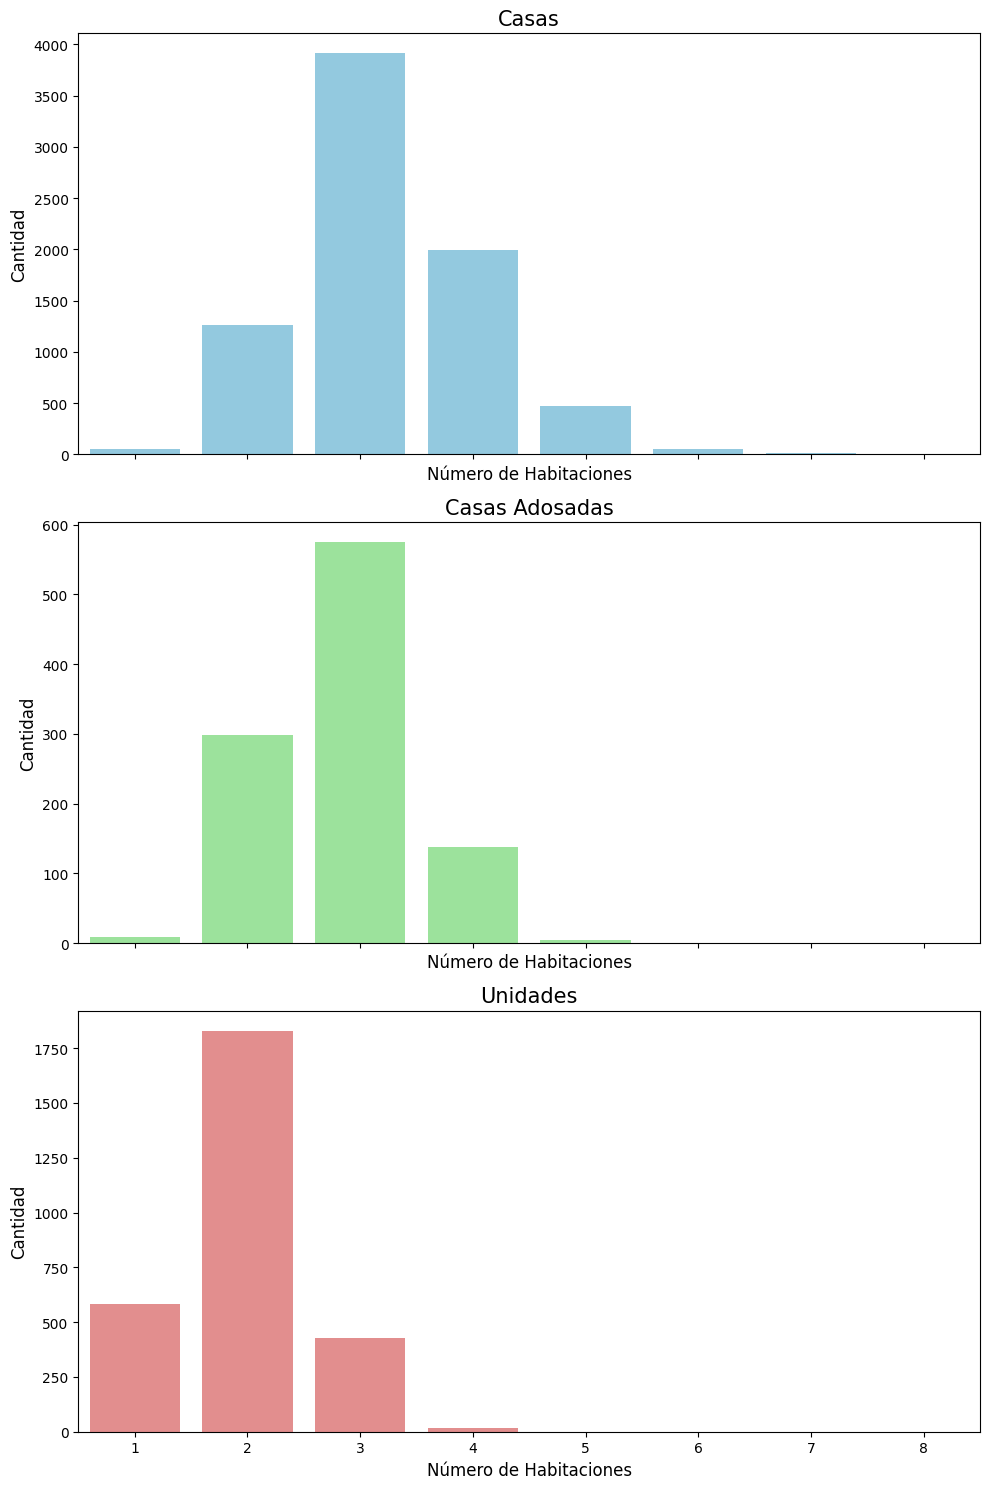

In [6]:
# Configuración de los gráficos
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Lista de tipos de propiedades
property_types = ['h', 't', 'u']

# Títulos para las gráficas
titles = ['Casas', 'Casas Adosadas', 'Unidades']

# Colores
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Crear las gráficas de barras
for ax, prop_type, title, color in zip(axes, property_types, titles, colors):
    sns.barplot(x=contingency_table.columns, y=contingency_table.loc[prop_type], ax=ax, color=color)
    ax.set_title(title, fontsize=15)
    ax.set_ylabel("Cantidad", fontsize=12)
    ax.set_xlabel("Número de Habitaciones", fontsize=12)

plt.tight_layout()
plt.show()



Análisis:

Casas (h):

La mayoría de las casas tienen 3 y 4 habitaciones.
Existe un número significativo de casas con 2 habitaciones y, en menor medida, de casas con 5 habitaciones.
La cantidad de casas con 1, 6, 7 y 8 habitaciones es bastante baja.
Casas Adosadas (t):

Las casas adosadas suelen tener entre 2 y 3 habitaciones en su mayoría.
Hay muy pocas casas adosadas con 1 y 5 habitaciones y ninguna con más de 5 habitaciones.
Unidades (u):

La mayoría de las unidades tienen 1 o 2 habitaciones.
Existe un número menor de unidades con 3 habitaciones y muy pocas con 4 habitaciones.
Es interesante notar que hay una unidad con 6 y otra con 8 habitaciones, lo cual es atípico para este tipo de propiedad.
Similitudes y Diferencias:

Similitudes:
En todos los tipos de propiedades, las categorías de 1 y 2 habitaciones están presentes, indicando que estas son configuraciones comunes en el mercado inmobiliario.
Las categorías con mayor número de habitaciones (7 y 8) son las menos comunes en todos los tipos de propiedades.
Diferencias:
Las casas ('h') presentan una diversidad en cuanto al número de habitaciones, teniendo propiedades desde 1 hasta 8 habitaciones, siendo las de 3 y 4 habitaciones las más comunes.
Las casas adosadas ('t') están principalmente concentradas en las categorías de 2 y 3 habitaciones.
Las unidades ('u') tienden a ser más pequeñas, con una concentración predominante en las categorías de 1 y 2 habitaciones.

### b) Segmentando por región, tipo y número de cuartos

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

In [7]:
# 1. Crear una tabla de contingencia con doble nivel en las columnas
contingency_table_2 = pd.crosstab(index=housing_data['region_name'],
                                  columns=[housing_data['type'], housing_data['rooms']])

# 2. Convertir el nivel de columnas 'type' en un segundo nivel para el índice
contingency_table_stacked = contingency_table_2.stack(level='type')

# Mostrar la tabla de contingencia modificada
contingency_table_stacked.head()

rooms                      1   2    3    4     5    6    7    8
region_name          type                                      
Eastern Metropolitan h     4  83  396  292  77.0  8.0  1.0  2.0
                     t     0  23   60   18   1.0  NaN  NaN  NaN
                     u     9  97   48    5   NaN  0.0  NaN  0.0
Eastern Victoria     h     0   2   13   17   1.0  0.0  0.0  0.0
                     t     0   0    0    0   0.0  NaN  NaN  NaN

La tabla de contingencia modificada muestra la cantidad de propiedades en función de la 'region_name' y 'type' como índices y 'rooms' como columnas.

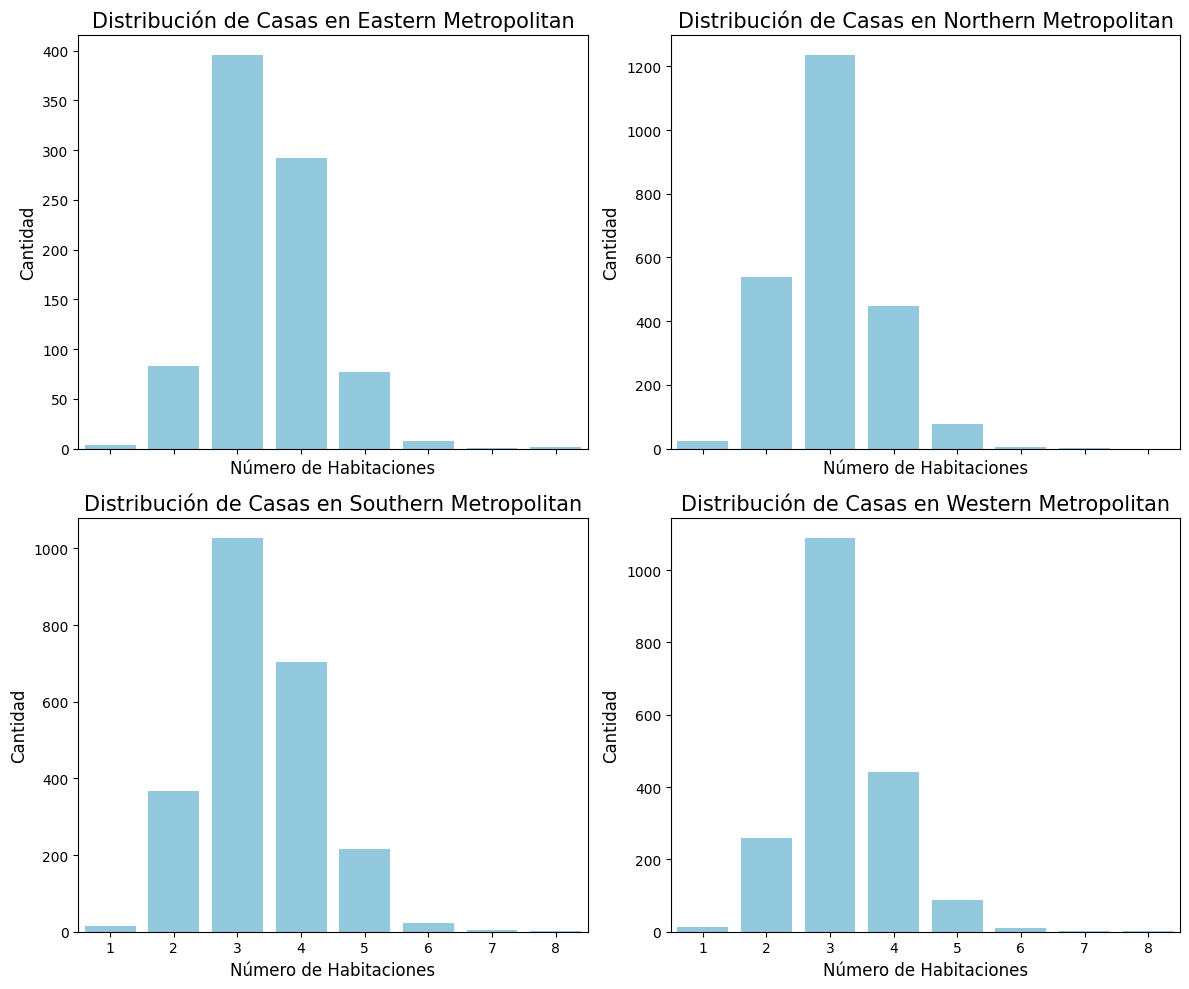

In [8]:
# Configuración de los gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Regiones a analizar
regions = ['Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan']

# Crear las gráficas de barras
for ax, region in zip(axes.flatten(), regions):
    sns.barplot(x=contingency_table_stacked.columns,
                y=contingency_table_stacked.loc[(region, 'h')],
                ax=ax, color='skyblue')
    ax.set_title(f"Distribución de Casas en {region}", fontsize=15)
    ax.set_ylabel("Cantidad", fontsize=12)
    ax.set_xlabel("Número de Habitaciones", fontsize=12)

plt.tight_layout()
plt.show()


Las gráficas representan la distribución de casas ('h') según el número de habitaciones en las cuatro regiones metropolitanas de interés: Eastern, Northern, Southern y Western.

Análisis:

Eastern Metropolitan:
Predominan las casas de 3 y 4 habitaciones, con una presencia notable también de casas de 5 habitaciones.
Northern Metropolitan:
Las casas de 3 habitaciones son las más comunes, seguidas por las de 2 y 4 habitaciones.
Southern Metropolitan:
Similar a la región Eastern, aquí también predominan las casas de 3 y 4 habitaciones.
Western Metropolitan:
Las casas de 3 habitaciones son, con diferencia, las más comunes, seguidas por las de 2 y 4 habitaciones.
Similitudes y Diferencias:

Similitudes:
En todas las regiones, las casas de 3 habitaciones son bastante comunes, indicando una preferencia o tendencia del mercado hacia propiedades de este tamaño.
Las casas de 1 y más de 5 habitaciones son menos comunes en todas las regiones, siendo opciones menos estándar en el mercado.
Diferencias:
La región Eastern Metropolitan muestra una distribución más equitativa entre casas de 3, 4 y 5 habitaciones en comparación con las otras regiones.
La región Western Metropolitan tiene una cantidad significativamente más alta de casas de 3 habitaciones en comparación con las demás categorías.
La región Northern Metropolitan tiene una presencia notable de casas de 2 habitaciones, más que las otras regiones.